In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df_students_take_tests = pd.read_csv("../tables_creation/final_tables/students_take_tests.csv")
df_students_take_tests = df_students_take_tests.loc[df_students_take_tests['year'].isin([2022, 2023])]
df_students_take_tests['KOATUU_2020'] = df_students_take_tests['KOATUU_2020'].astype(str).apply(lambda x: x[:-2])

df_test_centers = pd.read_csv("../tables_creation/final_tables/test_centers_edrpou.csv")
df_test_centers['KOATUU_2020'] = df_test_centers['KOATUU_2020'].astype(str)

df_locations = pd.read_csv("../tables_creation/final_tables/locations.csv")
df_locations['KOATUU_2020'] = df_locations['KOATUU_2020'].astype(str)

df_students = pd.read_csv("../tables_creation/final_tables/students.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_17912\180349948.py:11: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv("../tables_creation/final_tables/students.csv")


In [3]:
df_merged = df_students_take_tests.merge(df_locations, how='left', on='KOATUU_2020')
df_merged

,outid,year,score100,score12,score,test_status,test_subject,test_type,KOATUU_2020,EDRPOU_test_center,regname,areaname,tername,KATOTTG_2023,category,region_name
0,000069ec-4f21-4e21-9dd9-58bc986d1a0e,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,32010000,NaN,Інші країни,Чехія,м.Брно,OC32010000000000000,abroad,Czechia
1,000069ec-4f21-4e21-9dd9-58bc986d1a0e,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,32010000,NaN,Інші країни,м.Брно,м.Брно,OC32010000000000000,abroad,Czechia
2,000069ec-4f21-4e21-9dd9-58bc986d1a0e,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,32010000,NaN,Чехія,м.Брно,м.Брно,OC32010000000000000,abroad,Czechia
3,0001d1ae-b20d-4af4-8c2f-096b6b684d59,2022,NaN,NaN,NaN,Absent,ukrtest,NMT,5010000,NaN,Інші країни,Австрія,м.Відень,OC05010000000000000,abroad,Austia
4,0001d1ae-b20d-4af4-8c2f-096b6b684d59,2022,NaN,NaN,NaN,Absent,ukrtest,NMT,5010000,NaN,Інші країни,м.Відень,м.Відень,OC05010000000000000,abroad,Austia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235937,995b3abe-b4c4-4b89-b5ba-70f827c59ab4,2023,187.0,NaN,30.0,Accepted,spatest,NMT,2610600000,NaN,Івано-Франківська область,м.Коломия,м.Коломия,UA26080070010075786,town,Ivano-Frankivska
5235938,995b3abe-b4c4-4b89-b5ba-70f827c59ab4,2023,187.0,NaN,30.0,Accepted,spatest,NMT,2610600000,NaN,Івано-Франківська область,Коломийський район,м.Коломия,UA26080070010075786,town,Ivano-Frankivska
5235939,995d6cef-fcb6-4a61-9541-f7e7516bb5f8,2023,157.0,NaN,23.0,Accepted,spatest,NMT,21020000,NaN,Інші країни,Польща,м.Варшава,OC21020000000000000,abroad,Poland
5235940,995d6cef-fcb6-4a61-9541-f7e7516bb5f8,2023,157.0,NaN,23.0,Accepted,spatest,NMT,21020000,NaN,Інші країни,м.Варшава,м.Варшава,OC21020000000000000,abroad,Poland


# How many people registered, came to the test and reached the threshold in the Ukrainian language test in each country abroad?

In [15]:
df_merged['Test_accepted'] = df_merged['test_status'].mask(df_merged['test_status'] != 'Accepted')

In [23]:
# 2022

df_merged.loc[(df_merged['year'] == 2022) & (df_merged['category'] == 'abroad') & (df_merged['test_subject'] == 'ukrtest')].groupby(['region_name'])['test_status', 'score', 'Test_accepted'].count().rename(columns={'test_status': 'registered', 'score': 'came to the test', 'Test_accepted': 'reached the threshold'})

C:\Users\Admin\AppData\Local\Temp\ipykernel_17912\1501589914.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merged.loc[(df_merged['year'] == 2022) & (df_merged['category'] == 'abroad') & (df_merged['test_subject'] == 'ukrtest')].groupby(['region_name'])['test_status', 'score', 'Test_accepted'].count().rename(columns={'test_status': 'registered', 'score': 'came to the test', 'Test_accepted': 'reached the threshold'})


,registered,came to the test,reached the threshold
region_name,,,
Austia,2475,2253,2253
Belgium,1254,1065,1065
Bulgaria,1719,1515,1515
Canada,111,84,84
Croatia,372,309,309
Czechia,6789,5592,5592
Denmark,226,192,192
Estonia,841,736,736
Finland,279,210,210


In [24]:
# 2023

df_merged.loc[(df_merged['year'] == 2023) & (df_merged['category'] == 'abroad') & (df_merged['test_subject'] == 'ukrtest')].groupby(['region_name'])['test_status', 'score', 'Test_accepted'].count().rename(columns={'test_status': 'registered', 'score': 'came to the test', 'Test_accepted': 'reached the threshold'})

C:\Users\Admin\AppData\Local\Temp\ipykernel_17912\1254048928.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_merged.loc[(df_merged['year'] == 2023) & (df_merged['category'] == 'abroad') & (df_merged['test_subject'] == 'ukrtest')].groupby(['region_name'])['test_status', 'score', 'Test_accepted'].count().rename(columns={'test_status': 'registered', 'score': 'came to the test', 'Test_accepted': 'reached the threshold'})


,registered,came to the test,reached the threshold
region_name,,,
Austia,2877,2562,2559
Azerbaijan,160,112,112
Belgium,1404,1218,1218
Bulgaria,1587,1362,1362
Canada,1151,829,829
Croatia,171,99,99
Czechia,4698,3957,3957
Denmark,490,438,438
Estonia,861,759,759


In 2022, it was enough to recieve 1 point for the test two pass it; in 2023 the higher scores were established as a threshold:

5 for Ukrainian language

4 for Math

6 for History of Ukraine

etc)

In [26]:
print("Percentage of students who reached the threshold in the Ukrainian language test in Ukraine in 2023:", round(len(df_merged.loc[(df_merged['category'] != 'abroad') & (df_merged['year'] == 2023) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['test_status'] == 'Accepted')]) / len(df_merged.loc[(df_merged['category'] != 'abroad') & (df_merged['year'] == 2023) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['test_status'].isin(['Accepted', 'Failed']))]) * 100, 2), "%")
print("Percentage of students who reached the threshold in the Ukrainian language test abroad in 2023:", round(len(df_merged.loc[(df_merged['category'] == 'abroad') & (df_merged['year'] == 2023) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['test_status'] == 'Accepted')]) / len(df_merged.loc[(df_merged['category'] == 'abroad') & (df_merged['year'] == 2023) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['test_status'].isin(['Accepted', 'Failed']))]) * 100, 2), "%")

Percentage of students who reached the threshold in the Ukrainian language test in Ukraine in 2023: 99.9 %
Percentage of students who reached the threshold in the Ukrainian language test abroad in 2023: 99.95 %


# Difference in results for Ukrainian language test in Ukraine and abroad

[Text(0.5, 1.0, 'Students abroad, 2022')]

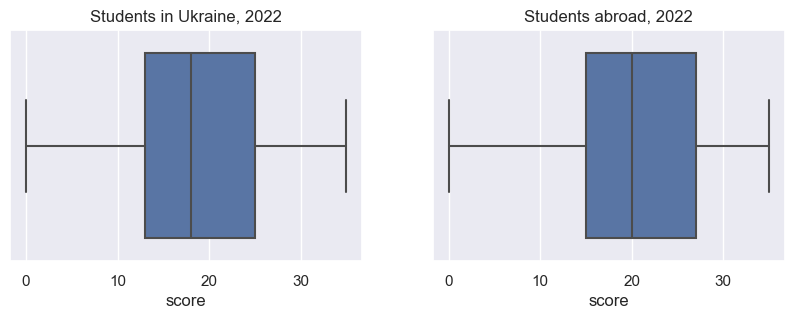

In [30]:
figure_dims = (10, 3)
fig, axs = plt.subplots(ncols=2, figsize=figure_dims)
sns.boxplot(x=df_merged.loc[(df_merged['category'] != 'abroad') & (df_merged['year'] == 2022) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['score'].notna()), 'score'], ax=axs[0]).set(title='Students in Ukraine, 2022')
sns.boxplot(x=df_merged.loc[(df_merged['category'] == 'abroad') & (df_merged['year'] == 2022) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['score'].notna()), 'score'], ax=axs[1]).set(title='Students abroad, 2022')

[Text(0.5, 1.0, 'Students abroad, 2023')]

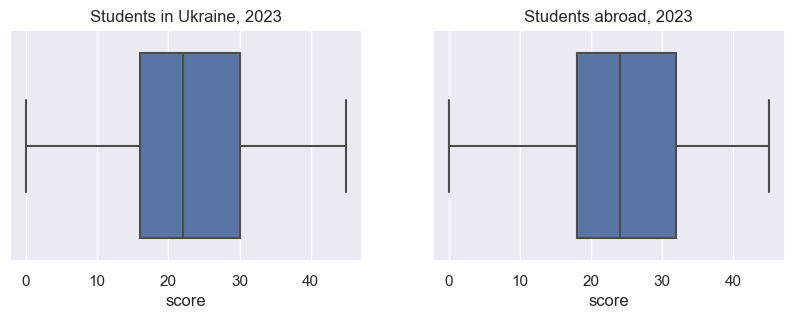

In [32]:
figure_dims = (10, 3)
fig, axs = plt.subplots(ncols=2, figsize=figure_dims)
sns.boxplot(x=df_merged.loc[(df_merged['category'] != 'abroad') & (df_merged['year'] == 2023) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['score'].notna()), 'score'], ax=axs[0]).set(title='Students in Ukraine, 2023')
sns.boxplot(x=df_merged.loc[(df_merged['category'] == 'abroad') & (df_merged['year'] == 2023) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['score'].notna()), 'score'], ax=axs[1]).set(title='Students abroad, 2023')

The statistics indlude absolute scores of students who came to the test. We can see that results for students abroad are better than for students in Ukraine in both year. Can we compare two samples?

# Mean scores of the Ukrainian language test by countries

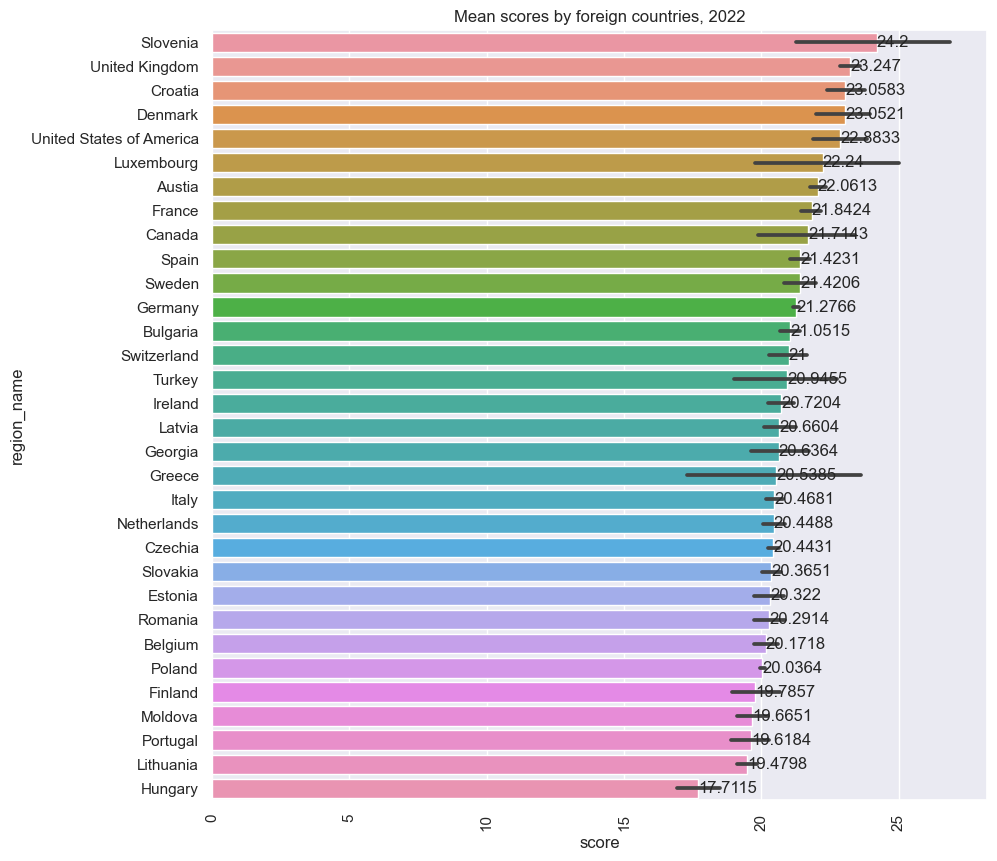

In [34]:
figure_dims = (10, 10)
fig, ax = plt.subplots(figsize=figure_dims)

sns.barplot(ax = ax, data=df_merged.loc[(df_merged['category'] == 'abroad') & (df_merged['year'] == 2022) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['score'].notna())], y="region_name", x="score", estimator="mean", orient="h", order=df_merged.loc[(df_merged['category'] == 'abroad') & (df_merged['year'] == 2022) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['score'].notna())].groupby(['region_name'])['score'].mean().sort_values(ascending=False).index).set(title='Mean scores by foreign countries, 2022')
values = ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)

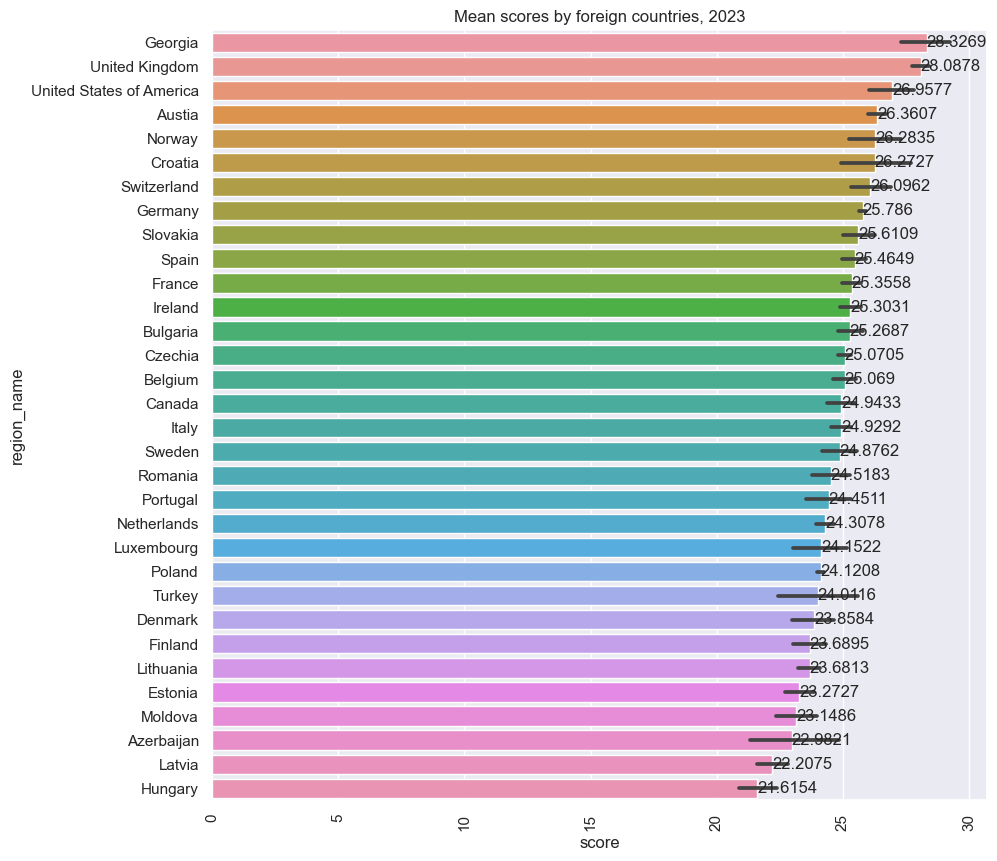

In [35]:
figure_dims = (10, 10)
fig, ax = plt.subplots(figsize=figure_dims)

sns.barplot(ax = ax, data=df_merged.loc[(df_merged['category'] == 'abroad') & (df_merged['year'] == 2023) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['score'].notna())], y="region_name", x="score", estimator="mean", orient="h", order=df_merged.loc[(df_merged['category'] == 'abroad') & (df_merged['year'] == 2023) & (df_merged['test_subject'] == 'ukrtest') & (df_merged['score'].notna())].groupby(['region_name'])['score'].mean().sort_values(ascending=False).index).set(title='Mean scores by foreign countries, 2023')
values = ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)

Some countries like UK and USA are on the top each year, while results for countries as Moldova and Hungary are always lower. Interesting!